1. Import Libraries and Load the Data

In [40]:
# Import Libraries 
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [46]:
# Load the dataset
ames_df = pd.read_csv('../data/AmesData.csv')

# Inspect the first few rows of the dataset
print(ames_df.head())

# Verify the columns in the dataset
print(ames_df.columns)


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL           78    10140   Pave   NaN      Reg   
1          20       RL           88    12803   Pave   NaN      IR1   
2          60       RL           86    11839   Pave   NaN      Reg   
3          90       RL           75     8235   Pave   NaN      Reg   
4          20       RL           60     9060   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      648     Fa  GdPrv         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      1    2006        WD         Normal    

2. Preprocessing Functions

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features, excluding 'SalePrice' from numeric features
numeric_features = ames_df.select_dtypes(include=['int64', 'float64']).drop(['SalePrice'], axis=1).columns
categorical_features = ames_df.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X = ames_df.drop('SalePrice', axis=1)
y = ames_df['SalePrice']

# Print shapes before preprocessing
print(f"X shape before preprocessing: {X.shape}")
print(f"y shape: {y.shape}")

X_preprocessed = preprocessor.fit_transform(X)

# Print shapes after preprocessing
print(f"X shape after preprocessing: {X_preprocessed.shape}")

print("Data preprocessed successfully.")


X shape before preprocessing: (2769, 79)
y shape: (2769,)
X shape after preprocessing: (2769, 300)
Data preprocessed successfully.


3. Model Training and Evaluation Functions

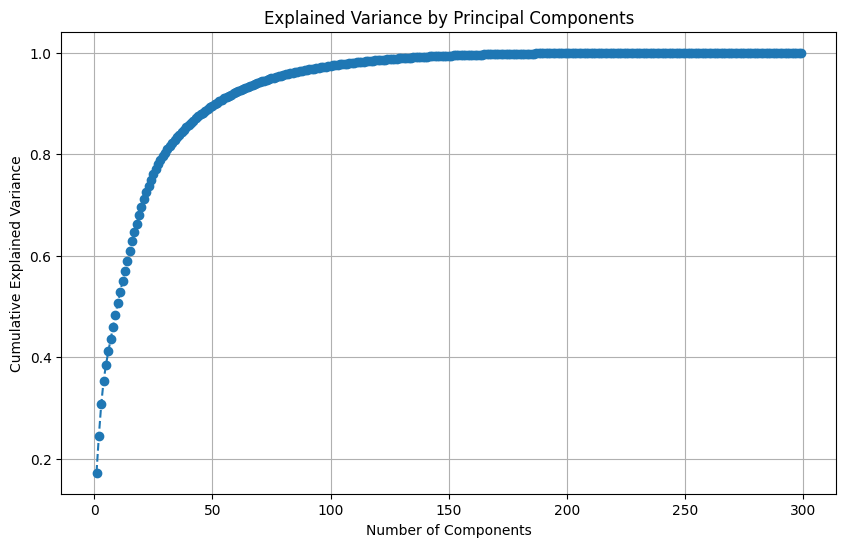

In [48]:
# Determine the Number of PCA Components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with the preprocessed data
pca = PCA()
pca.fit(X_preprocessed)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [51]:
# Apply PCA 
# Choose an appropriate number of components (e.g., 20)
n_components = 20
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_preprocessed)
print("PCA applied successfully.")


PCA applied successfully.


In [52]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


4. Main Execution

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Train the model
model = LinearRegression()
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, Training Time: {training_time}s')

MAE: 20910.472680860425, MSE: 909314670.3484915, RMSE: 909314670.3484915, R^2: 0.8482081872760651, Training Time: 0.07802319526672363s
